<a href="https://colab.research.google.com/github/YoonTae-Hwang/trading_repository/blob/master/Portfolio_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install yfinance
!pip install riskfolio-lib

In [0]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio.Portfolio as pf
import riskfolio.PlotFunctions as plf

In [11]:
#step1. data 
start = "2016-01-01"
end = "2019-12-30"

# Tickers of assets
assets = ['MMM', 'TGT', 'CMCSA', 'CPB', 'MO', 'NBL', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'AGN', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'DHR',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI']

assets.sort()


#Download data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets


[*********************100%***********************]  25 of 25 completed


In [16]:
# Calculating returns
Y = data[assets].pct_change().dropna()
display(Y.head())

,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JPM,LUV,MMC,MMM,MO,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.004098,-0.020257,0.004036,0.019693,0.000180,0.009305,0.003678,0.005783,0.001854,0.009483,0.001729,0.011916,0.008284,0.004359,0.020213,0.004562,0.004478,0.015881,0.000212,0.028236,0.009758,0.017539,0.002410,0.013734,-0.010857
2016-01-06,-0.017103,-0.114864,0.002412,-0.017557,-0.007727,-0.012473,-0.001736,-0.011239,-0.011650,-0.035867,-0.014436,0.009185,-0.012051,-0.020141,0.010589,-0.018165,-0.058247,0.005547,0.000212,0.001592,-0.015647,-0.010155,-0.030048,-0.009035,-0.029145
2016-01-07,-0.000989,-0.051389,-0.016573,-0.027699,-0.011047,-0.019769,-0.012207,-0.008855,-0.025666,-0.046058,-0.040439,-0.021004,-0.007577,-0.024362,-0.017408,-0.034783,-0.025245,-0.022066,-0.030309,-0.010411,-0.031557,-0.002700,-0.020570,-0.005492,-0.030019
2016-01-08,-0.012172,0.002736,-0.016037,-0.025425,0.001099,-0.002241,0.005707,-0.016402,0.000565,-0.017642,-0.022399,0.006198,-0.013967,-0.003405,0.001720,0.003067,-0.001942,-0.001538,-0.011366,-0.007308,-0.001448,-0.033839,-0.011387,-0.009719,-0.011254
2016-01-11,-0.000300,-0.043383,-0.016851,-0.010215,0.000915,-0.011791,0.005674,0.005287,-0.000565,0.006616,-0.001527,-0.004028,-0.014542,-0.000213,0.020948,-0.000573,-0.059682,0.016436,0.000000,0.009869,-0.001450,0.014570,-0.004607,0.005800,-0.019919


Module Methods
 - pf.Portfolio
       - returns(Dataframe) : that containts the returns of the asset
       - sht(bool) : Indicate if the portfolio consider short positions
       - uppersht(float) : Indicate the maximum value of the sum of short positions. The default is 0.2.
       - upperlng(float) : Indicate the maximum value of the sum of long positions. The default is 1.
       - factors (DataFrame) – that containts the returns of the factors. The default is None.
       - alpha (float) – Significance level of CVaR and CDaR. The default is 0.01.
       - kindbench (bool) – True if the benchmark is a portfolio with detailed weights and False if the benchmark is an index. The default is True.
       - allowTO (bool) – Indicate if there is turnover constraints. The default is False.
       - turnover (float) – The maximum limit of turnover deviatons. The default is 0.05.
       - allowTE (bool) – Indicate if there is tracking error constraints.. The default is False.
       - TE (float) – The maximum limit of tracking error deviatons. The default is 0.05.
       - benchindex (DataFrame) – A dataframe that containts the returns of an index. If kindbench is the tracking error constraints are calculated respect to this index. The default is None.
       - benchweights (DataFrame) – A dataframe that containts the weights of an index. The default is the equally weighted portfolio 1/N.
       - ainequality (nd-array) – The matrix A of the linear constraint A≥B. The default is None.
       - binequality (1d-array) – The matrix B of the linear constraint A≥B. The default is None.
       - upperdev (float) – Constraint on max level of standard deviation. The default is None.
       - uppermad (float) – Constraint on max level of MAD. The default is None.
       - uppersdev (float) – Constraint on max level of semi standard deviation. The default is None.
       - upperflpm (float) – Constraint on max level of first lower partial moment. The default is None.
       - upperslpm (float, optional) – Constraint on max level of second lower partial moment. The default is None.
       - upperCVaR (float, optional) – Constraint on max level of CVaR. The default is None.
       - upperwr (float, optional) – Constraint on max level of worst realization. The default is None.
       - uppermdd (float, optional) – Constraint on max level of maximum drawdown of uncompounded cumulated returns. The default is None.
       - upperadd (float, optional) – Constraint on max level of average drawdown of uncompounded cumulated returns. The default is None.
       - upperCDaR (float, optional) – Constraint on max level of conditional drawdown at risk of uncompounded cumulated returns. The default is None.














## 2. Estimating Mean Variance Portfolios
  
> 2-1.  Calculating the portfolio that maximizes Sharpe ratio.


> 2.2 Plotting portfolio composition


> 2.3 Calculate efficient frontier





Module Methods
 - assets_stats(method_mu='hist', method_cov='hist', **kwargs)
       - Calculate the inputs that will be use by the optimization method when we select the input model=’Classic’.














In [17]:
port = pf.Portfolio(returns = Y) # Building the portfolio object

port.assets_stats(method_mu= 'hist', method_cov= 'hist')  # Method to estimate expected returns & covariance matrix based on historical data.

w = port.optimization(model='Classic', #’Classic’: use estimates of expected return vector and covariance matrix that depends on historical data.
                      rm='MV',         # ’MV’: Standard Deviation.
                      obj='Sharpe',    #’Sharpe’: Maximize the risk adjusted return ratio based on the selected risk measure.
                      rf=0,            # Risk free rate
                      l=0,             #Risk aversion factor of the ‘Utility’ objective function. The default is 2.
                      hist = True)
display(w.T) #The weights of optimum portfolio.


,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JPM,LUV,MMC,MMM,MO,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,6.234537e-09,5.018831e-09,0.087961,1.148869e-08,5.512584e-08,0.088808,2.649579e-08,0.043622,0.118637,2.299115e-08,0.112626,1.558098e-08,0.192991,1.091287e-08,1.733201e-08,0.155092,5.686409e-09,0.096447,2.943758e-08,1.863168e-08,9.030893e-09,0.070728,7.360907e-09,0.033087,5.714610e-08


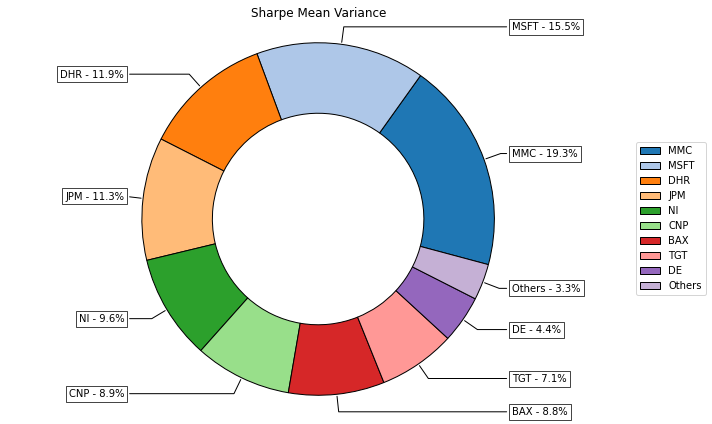

In [18]:
ax = plf.plot_pie(w=w,                               # w (DataFrame) – Weights of the portfolio.
                  title='Sharpe Mean Variance',     
                  others=0.05,                       #others (float) – Percentage of others section. The default is 0.05.
                  nrow = 25,                         #nrow (int) – Number of rows of the legend. The default is 25.
                  cmap = "tab20",                    #cmap (cmap) – Color scale, represente the risk adjusted return ratio. The default is ‘tab20’.
                  height=6,                        
                  width=10,
                  ax=None)

In [21]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model="Classic",
                                   rm = "MV",
                                   points=points,  #points (scalar) – Number of point calculated from the efficient frontier. The default is 50.
                                   rf=0,
                                   hist=True)

display(frontier.T.head())

,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JPM,LUV,MMC,MMM,MO,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,2.913823e-02,2.165101e-07,0.043721,4.092978e-02,3.302187e-02,0.074062,3.373832e-02,0.006329,0.005904,1.342475e-07,0.073958,3.094450e-02,0.127866,9.313654e-04,7.816658e-02,1.694809e-07,1.267002e-03,0.116110,5.117589e-07,1.487704e-01,2.141830e-03,0.042142,1.308215e-06,0.110835,2.044491e-05
1,7.273183e-10,2.618904e-10,0.081694,3.548354e-09,2.330028e-02,0.094855,1.853569e-02,0.023251,0.046028,9.231807e-10,0.105652,1.307359e-03,0.181751,7.523353e-10,2.216935e-02,2.081473e-02,3.507937e-10,0.136804,2.061967e-09,7.093426e-02,7.136603e-10,0.059965,4.898341e-10,0.112940,3.215992e-09
2,3.998540e-10,2.127758e-10,0.087512,9.064979e-10,1.044928e-02,0.102357,8.020516e-03,0.026554,0.064079,7.599519e-10,0.108030,1.688923e-09,0.198404,5.732677e-10,5.937818e-09,5.060240e-02,2.656191e-10,0.145233,1.439023e-09,2.299319e-02,5.126513e-10,0.066279,3.744976e-10,0.109487,2.060172e-09
3,8.666250e-10,5.880134e-10,0.089335,1.818488e-09,2.633117e-08,0.102051,9.379515e-09,0.031144,0.082724,2.704970e-09,0.110547,2.914292e-09,0.203112,1.411590e-09,3.579761e-09,8.497592e-02,7.003621e-10,0.136629,4.378377e-09,5.910335e-09,1.231213e-09,0.069269,9.411963e-10,0.090214,7.206973e-09
4,2.567010e-10,1.970352e-10,0.088612,4.973360e-10,3.227083e-09,0.095302,1.388004e-09,0.037578,0.101225,9.744429e-10,0.111646,7.355767e-10,0.197934,4.445164e-10,7.978912e-10,1.210130e-01,2.280229e-10,0.115896,1.342592e-09,9.276403e-10,3.727383e-10,0.070028,2.985416e-10,0.060766,2.364320e-09


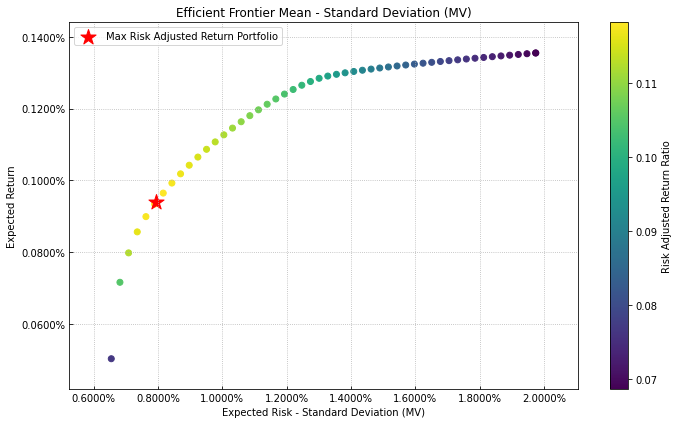

In [24]:
# Plotting the efficient frontier

mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = plf.plot_frontier(w_frontier=frontier,    #w_frontier (DataFrame) – Portfolio weights of some points in the efficient frontier.
                       mu=mu,
                       cov=cov,
                       returns=returns,
                       rm="MV",
                       rf=0,
                       alpha=0.01, 
                       cmap='viridis',         #cmap (cmap, optional) – Colorscale, represente the risk adjusted return ratio. The default is ‘viridis’.
                       w=w,
                       label="Max Risk Adjusted Return Portfolio",
                       marker='*',
                       s=16,
                       c='r',
                       height=6,
                       width=10,
                       ax=None)


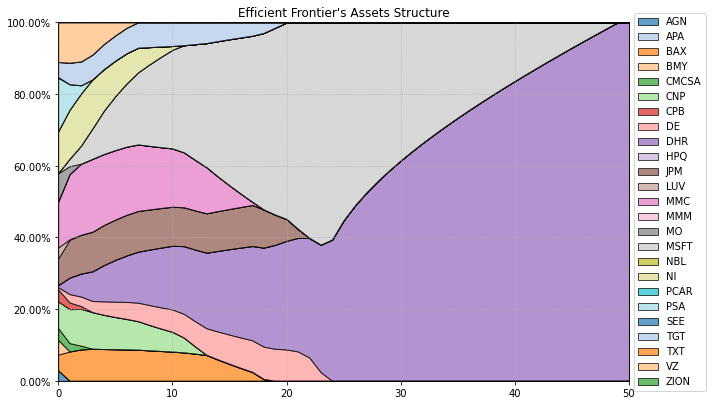

In [29]:
ax = plf.plot_frontier_area(w_frontier=frontier,
                            cmap="tab20",
                            height=6,
                            width=10,
                            ax=None)
#50개의 조합에 대해서 각각의 자산배분상태

## 3. Estimating Mean Risk Portfolios
  
> 3.1 Calculating the portfolio that maximizes Return/CVaR ratio.

> 3.2 Plotting portfolio composition

> 3.3 Calculate efficient frontier


In [32]:
rm = 'CVaR' # Risk measure

w = port.optimization(model="Classic",
                      rm=rm,
                      obj='Sharpe',
                      rf=0, 
                      l=0,
                      hist=True)

display(w.T)

,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JPM,LUV,MMC,MMM,MO,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
weights,6.030804e-16,4.541692e-16,2.516942e-15,8.585258e-16,1.778758e-15,0.1283,1.486912e-15,1.813645e-15,0.635023,2.311452e-15,1.666541e-14,1.292921e-15,8.311463e-15,8.542339e-16,9.754852e-16,0.066021,5.326811e-16,6.097428e-14,3.820678e-15,1.369740e-15,5.206371e-16,0.170656,4.603499e-16,3.281970e-15,4.687797e-15


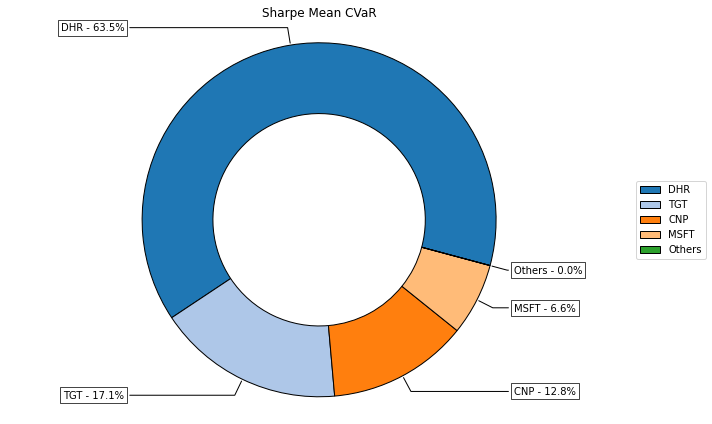

In [33]:
ax = plf.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

In [34]:
#3.3 Calculate efficient frontier

points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model='Classic',
                                   rm=rm,
                                   points=points,
                                   rf=0, 
                                   hist=True)

display(frontier.T.head())


,AGN,APA,BAX,BMY,CMCSA,CNP,CPB,DE,DHR,HPQ,JPM,LUV,MMC,MMM,MO,MSFT,NBL,NI,PCAR,PSA,SEE,TGT,TXT,VZ,ZION
0,0.067524,6.440517e-13,8.961306e-13,1.155643e-01,0.047298,7.546228e-12,0.139025,1.065071e-12,6.528992e-13,2.067097e-13,1.393840e-12,0.064679,0.036507,4.708501e-13,8.348165e-11,6.063216e-13,4.430473e-13,1.014966e-12,2.584397e-02,0.324125,1.668053e-12,0.107333,3.639386e-13,0.072102,1.419093e-12
1,0.062791,3.713362e-13,3.928190e-12,4.364608e-02,0.043742,6.403001e-12,0.137388,1.062492e-12,1.514591e-02,4.190184e-13,3.980478e-12,0.083061,0.132108,6.013197e-13,1.358821e-12,3.131527e-12,4.430295e-13,1.295060e-12,2.362251e-12,0.279162,1.300085e-12,0.111584,5.972957e-13,0.091372,3.154253e-12
2,0.058184,1.160539e-12,1.227492e-11,2.236732e-02,0.040832,1.998952e-11,0.136764,3.320106e-12,3.410410e-02,1.309529e-12,1.243533e-11,0.060439,0.184389,1.879143e-12,4.245196e-12,9.786518e-12,1.384527e-12,4.046799e-12,7.373565e-12,0.254028,4.062470e-12,0.102403,1.866626e-12,0.106490,9.853991e-12
3,0.054977,1.370342e-12,1.936043e-11,4.931173e-03,0.029807,8.296023e-11,0.129208,4.078724e-12,5.605232e-02,1.741858e-12,2.052285e-11,0.045744,0.236356,2.355476e-12,5.710752e-12,1.491010e-11,1.710427e-12,5.895968e-12,6.706477e-12,0.235386,4.169401e-12,0.096665,2.110880e-12,0.110874,9.454005e-12
4,0.045509,1.338227e-14,2.130578e-13,3.263708e-13,0.033196,6.068413e-11,0.104953,4.274834e-14,8.852934e-02,1.756472e-14,2.388992e-13,0.052355,0.220769,2.367622e-14,5.746118e-14,1.633260e-13,1.742017e-14,5.876995e-14,6.417988e-14,0.222072,4.005164e-14,0.103174,2.091968e-14,0.129444,1.007357e-13


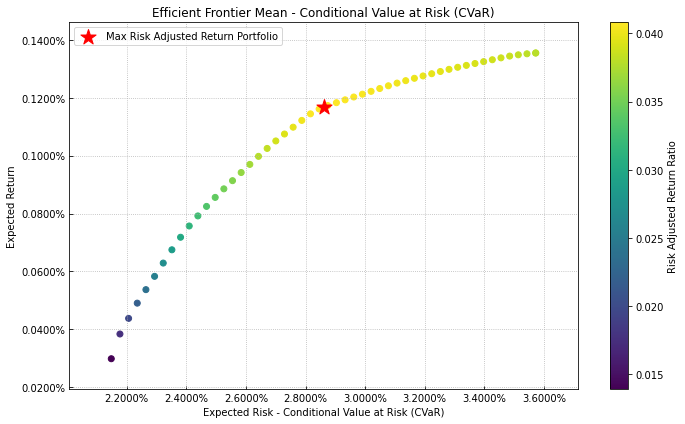

In [35]:


ax = plf.plot_frontier(w_frontier=frontier,    #w_frontier (DataFrame) – Portfolio weights of some points in the efficient frontier.
                       mu=mu,
                       cov=cov,
                       returns=returns,
                       rm=rm,
                       rf=0,
                       alpha=0.01, 
                       cmap='viridis',         #cmap (cmap, optional) – Colorscale, represente the risk adjusted return ratio. The default is ‘viridis’.
                       w=w,
                       label="Max Risk Adjusted Return Portfolio",
                       marker='*',
                       s=16,
                       c='r',
                       height=6,
                       width=10,
                       ax=None)


In [0]:
#3.4 Calculate Optimal Portfolios for Several Risk Measures
